In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras 
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import image_dataset_from_directory
from keras.layers import Conv2D, Dense, MaxPooling2D, Dropout,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16

In [2]:
import keras
import tensorflow as tf

print("Keras version:", keras.__version__)
print("TensorFlow version:", tf.__version__)

Keras version: 2.6.0
TensorFlow version: 2.6.2


In [3]:
# applying different data augumentation methods to the training data
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
)

valid_gen = ImageDataGenerator(
    rescale=1./255,  # Corrected rescale parameter
    validation_split=0.2,
    
)

In [4]:
Image_size = (255, 255)
Batch_size = 32

In [5]:
#Loading the training and validation data from the director
data_dir = "../input/plantvillage-dataset/color"
train_generator = train_gen.flow_from_directory(
    data_dir,
    target_size=Image_size,
    batch_size=Batch_size,
    subset="training",
    class_mode="categorical",
    color_mode="rgb",  # Set color_mode to "grayscale" for grayscale images
    
)

valid_generator = valid_gen.flow_from_directory(
    data_dir,
    target_size=Image_size,
    batch_size=Batch_size,
    subset="validation",
    class_mode="categorical",
    color_mode="rgb",  # Set color_mode to "grayscale" for grayscale images
      
)

ERROR! Session/line number was not unique in database. History logging moved to new session 2
Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


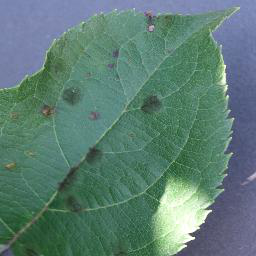

In [7]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image

image = Image.open("../input/plantvillage-dataset/color/Apple___Apple_scab/01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Scab 3112.JPG")
image

In [8]:
image_arr = np.array(image)
image_arr.shape

(256, 256, 3)

In [9]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

# Load InceptionV3 model without the top layer
model = InceptionV3(include_top=False, input_shape=(255, 255, 3), weights="imagenet")

# Freeze all layers in the base model
for layer in model.layers:
    layer.trainable = False

# Flatten the output of the InceptionV3 model
x = Flatten()(model.output)

# Add a dense layer with 1024 units and ReLU activation
dense1 = Dense(1024, activation="relu")(x)

# Add the final classification layer with softmax activation
prediction = Dense(38, activation="softmax")(dense1)

# Create a new model with InceptionV3 as the base and the custom dense layers
model = Model(inputs=model.inputs, outputs=prediction)

87924736/87910968 [==============================] - 1s 0us/step


In [10]:
from tensorflow.keras.metrics import Precision, Recall, AUC

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy', Precision(), Recall(), AUC()]
)

In [11]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch = train_generator.n // train_generator.batch_size,    #The 2 slashes division return rounded integer
        epochs = 5,
        validation_data = valid_generator,
        validation_steps = valid_generator.n // valid_generator.batch_size
        )

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1358/1358 [==============================] - 1082s 786ms/step - loss: 1.7621 - accuracy: 0.7732 - precision: 0.8332 - recall: 0.7371 - auc: 0.9721 - val_loss: 0.4830 - val_accuracy: 0.8477 - val_precision: 0.8811 - val_recall: 0.8213 - val_auc: 0.9909
Epoch 2/5
1358/1358 [==============================] - 732s 539ms/step - loss: 0.4482 - accuracy: 0.8634 - precision: 0.8906 - recall: 0.8438 - auc: 0.9910 - val_loss: 0.4058 - val_accuracy: 0.8712 - val_precision: 0.9010 - val_recall: 0.8485 - val_auc: 0.9934
Epoch 3/5
1358/1358 [==============================] - 721s 531ms/step - loss: 0.4156 - accuracy: 0.8735 - precision: 0.8966 - recall: 0.8601 - auc: 0.9914 - val_loss: 0.3400 - val_accuracy: 0.8921 - val_precision: 0.9081 - val_recall: 0.8791 - val_auc: 0.9937
Epoch 4/5
1358/1358 [==============================] - 722s 532ms/step - loss: 0.3910 - accuracy: 0.8818 - precision: 0.9030 - recall: 0.8690 - auc: 0.9917 - val_loss: 0.3234 - val_accuracy: 0.8992 - val_precision: 0

In [12]:
model.save('Inception_color_model.h5')

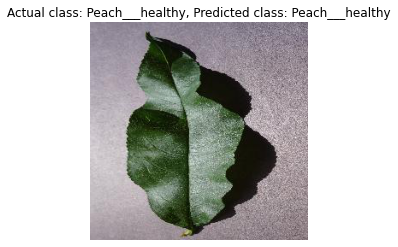

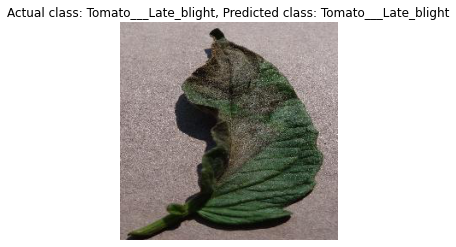

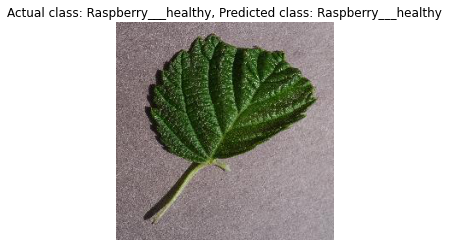

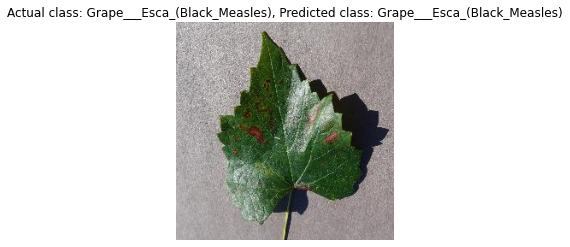

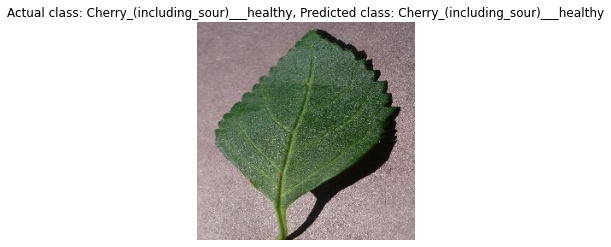

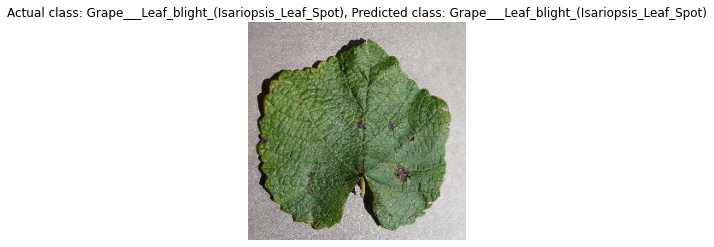

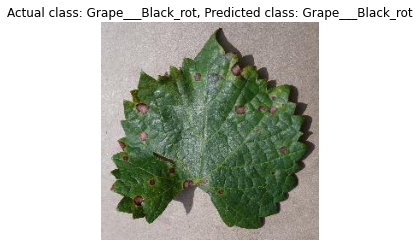

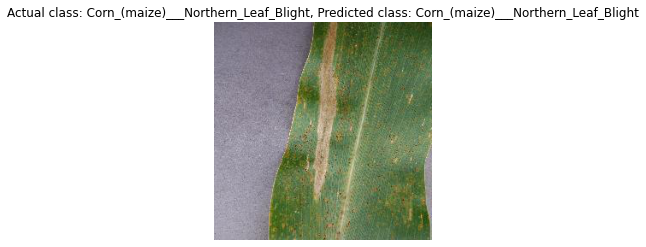

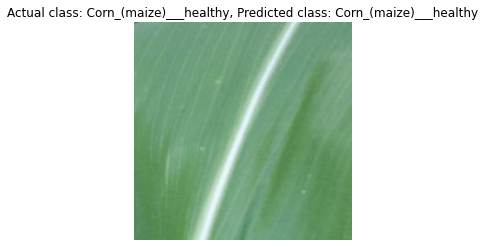

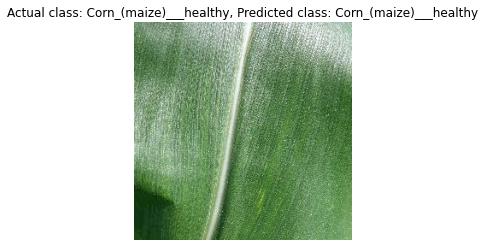

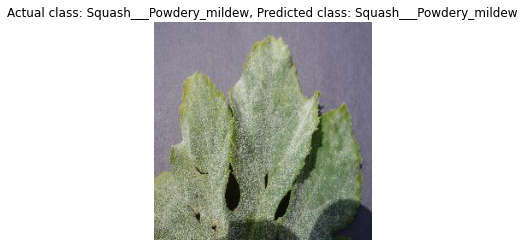

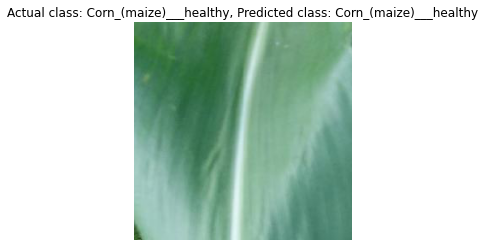

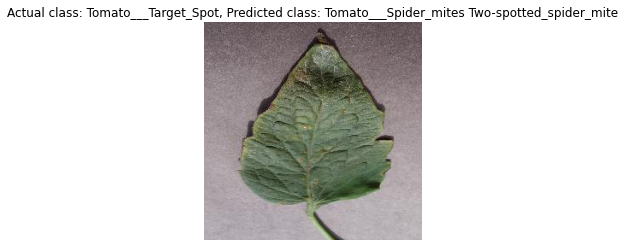

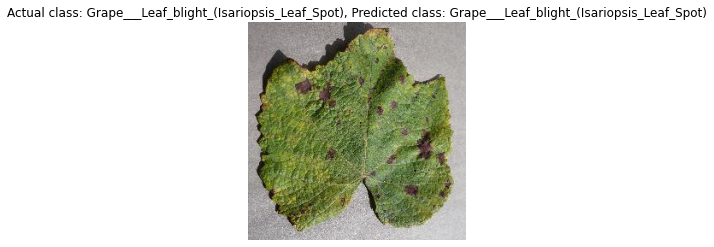

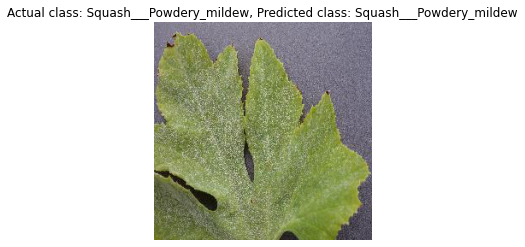

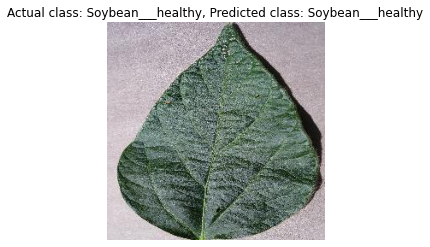

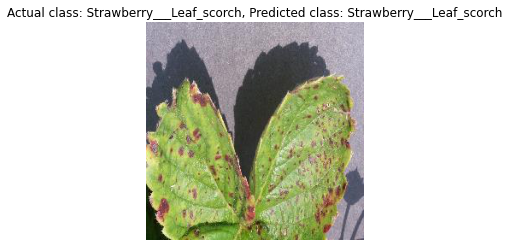

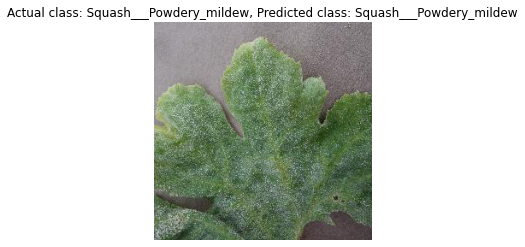

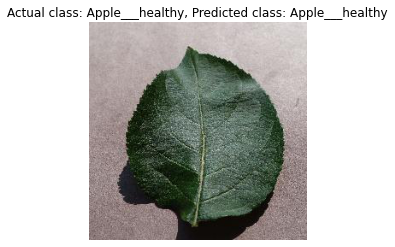

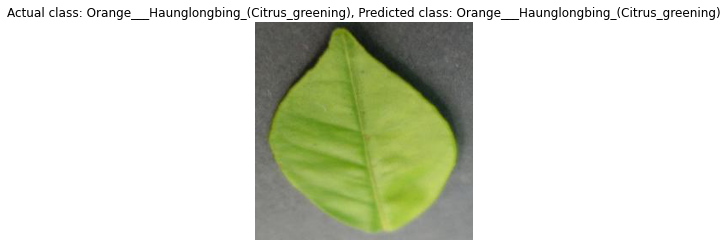

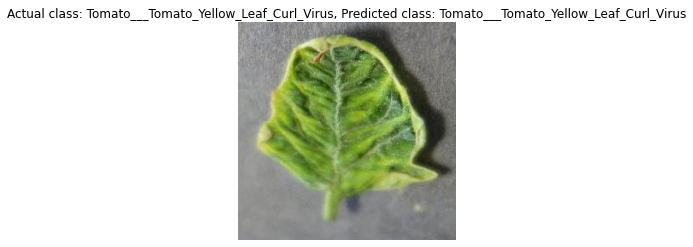

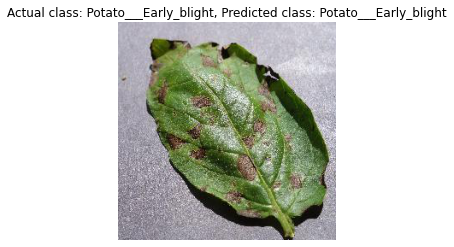

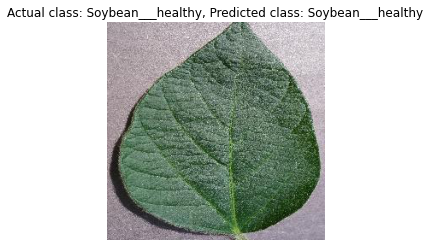

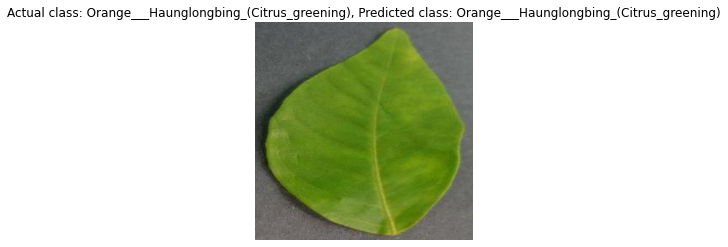

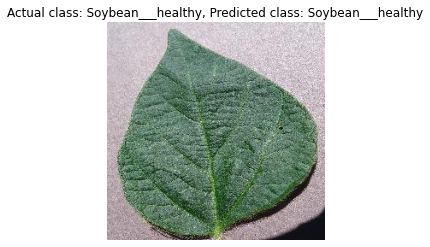

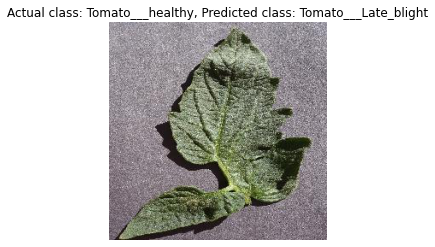

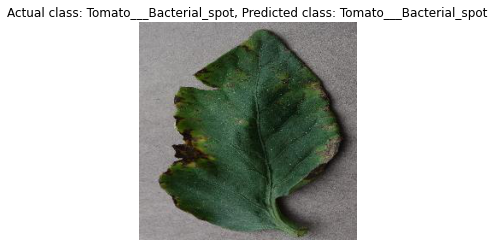

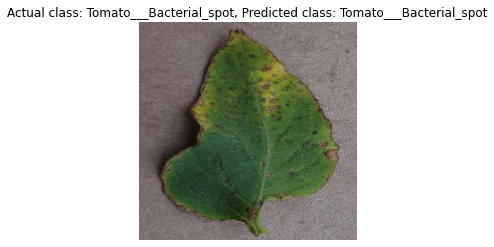

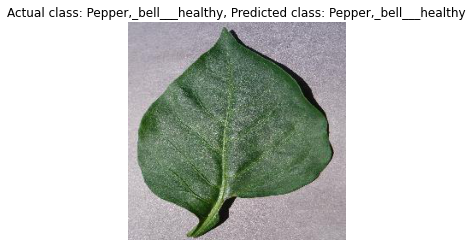

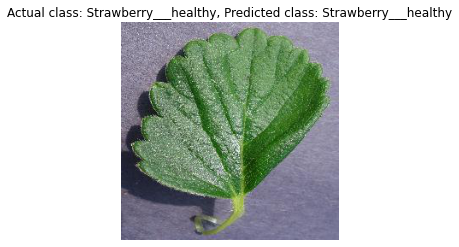

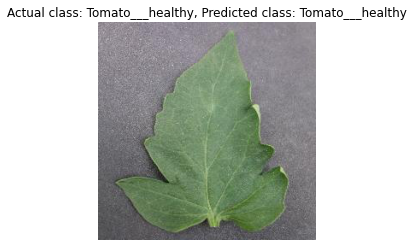

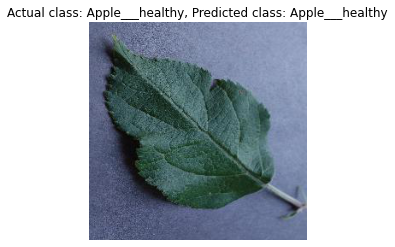

In [13]:
import numpy as np
import matplotlib.pyplot as plt

class_names = [
    'Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
    'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy',
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_',
    'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot',
    'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy',
    'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy',
    'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight',
    'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy',
    'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy',
    'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'
]

# Reset the validation generator to start from the beginning
valid_generator.reset()

# Predict classes for one batch from the validation set
batch_images, batch_labels = valid_generator.next()  # Get one batch of images and labels

predictions = model.predict(batch_images)  # Make predictions for the batch

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Display the images along with their actual and predicted classes
for i in range(len(batch_labels)):
    # Load and display the image
    img = batch_images[i]
    plt.imshow(img)
    plt.axis('off')

    # Display the actual and predicted classes
    actual_class = class_names[np.argmax(batch_labels[i])]
    predicted_class = class_names[predicted_classes[i]]
    plt.title(f"Actual class: {actual_class}, Predicted class: {predicted_class}")
    plt.show()

In [14]:
evaluation = model.evaluate_generator(valid_generator)

# Extract accuracy from the evaluation result
accuracy = evaluation[1]  # Assuming accuracy is the second element in the evaluation result

print("Validation Accuracy:", accuracy)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Validation Accuracy: 0.8860724568367004


In [15]:
from sklearn.metrics import classification_report

# Assuming you have the true labels (y_true) and predicted labels (y_pred)
# y_true and y_pred should be arrays or lists containing the true and predicted labels respectively

# Calculate accuracy
accuracy = model.evaluate_generator(valid_generator)[1]  # Extract accuracy from the evaluation result

# Calculate predicted labels
y_pred = model.predict_generator(valid_generator).argmax(axis=1)

# Calculate true labels
y_true = valid_generator.classes

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names)

print("Validation Accuracy:", accuracy)
print("Classification Report:")
print(report)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Validation Accuracy: 0.8860724568367004
Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.02      0.02      0.02       126
                                 Apple___Black_rot       0.02      0.02      0.02       124
                          Apple___Cedar_apple_rust       0.00      0.00      0.00        55
                                   Apple___healthy       0.03      0.04      0.03       329
                               Blueberry___healthy       0.03      0.03      0.03       300
          Cherry_(including_sour)___Powdery_mildew       0.03      0.02      0.03       210
                 Cherry_(including_sour)___healthy       0.00      0.00      0.00       170
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00       102
                       Corn_(maize)___Common_rust_       0.02      0.02      0.02       238
               C

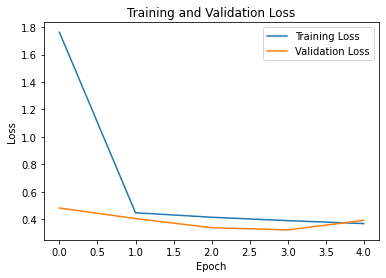

In [16]:
import matplotlib.pyplot as plt

# Training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

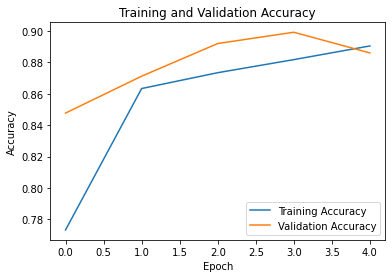

In [17]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
